# Text Mining(reviews)

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re # regular expressions

In [3]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# creating empty reviews list 
kindle_reviews =[]
#forest = ["the","king","of","jungle"]

In [5]:
for i in range(1,20):
  ip=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
kindle_reviews=kindle_reviews+ip   # adding the reviews of one page to empty list which in future contains all the reviews

In [6]:
# writng reviews in a text file 
#with open("iphone.txt","w",encoding='utf8') as output:
#    for i in iphone_reviews:
#        output.write(i+"\n\n")
#    #output.write(str(iphone_reviews))    
# Joinining all the reviews into single paragraph

In [7]:
ip_rev_string = " ".join(kindle_reviews)

In [8]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [9]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [10]:
#stop_words = stopwords.words('english')
with open('stop.txt','r')as sw:
    stopwords = sw.read()
stopwords = stopwords.split("\n")

In [11]:
#stp_wrds = stopwords+stop_words
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

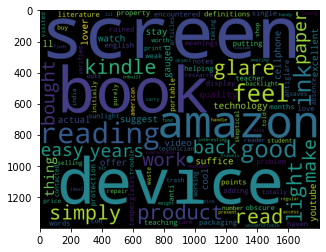

In [12]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [13]:
# positive words # Choose the path for +ve words stored in system
with open('positive-words.txt','r')as pos:
     poswords = pos.read().split("\n")  
poswords = poswords[36:]

In [14]:
# negative words  Choose path for -ve words stored in system
with open('negative-words.txt','r') as neg:
  negwords = neg.read().split("\n")
negwords = negwords[37:]

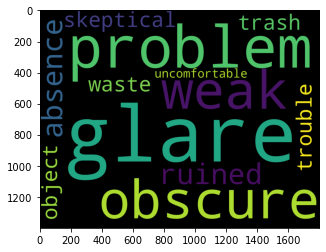

In [15]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

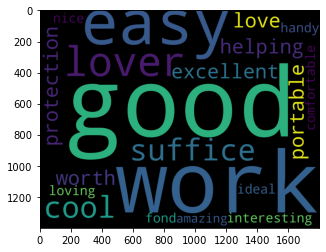

In [16]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)